Practice: building a MNIST-M classifier using a convnet!

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
%matplotlib inline

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Now, please run python create_mnistm.py to create "mnistm_data.pkl"


In [0]:
#some UTILITY FUNCTIONS
def shuffle_aligned_list(data):
    """Shuffle arrays in a list by shuffling each array identically."""
    num = data[0].shape[0]
    p = np.random.permutation(num)
    return [d[p] for d in data]

def batch_generator(data, batch_size, shuffle=True):
    """Generate batches of data.
    
    Given a list of array-like objects, generate batches of a given
    size by yielding a list of array-like objects corresponding to the
    same slice of each input.
    """
    if shuffle:
        data = shuffle_aligned_list(data)

    batch_count = 0
    while True:
        if batch_count * batch_size + batch_size >= len(data[0]):
            batch_count = 0

            if shuffle:
                data = shuffle_aligned_list(data)

        start = batch_count * batch_size
        end = start + batch_size
        batch_count += 1
        yield [d[start:end] for d in data]

In [0]:
mnistm = pkl.load(open("mnistm_data.pkl", 'rb'))

In [0]:
mnistm_train = mnistm['train']/255
mnistm_test = mnistm['test']/255
mnistm_valid = mnistm['valid']/256

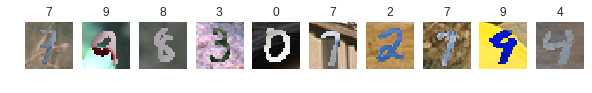

In [0]:
# visualize the dataset
start = 1500 #pick any number
for i in range(10):
  plt.subplot(2, 10, i + 11)
  plt.title(np.argmax(mnist.test.labels[start + i]))
  plt.imshow(np.reshape(mnistm_test[start + i:start + i + 1], (28, 28, 3)))
  plt.axis('off')
  
plt.gcf().set_size_inches(10, 4)
plt.show()

Code writing begins below

In [0]:
x = tf.placeholder(tf.float32, [None, 28, 28, 3])
y = tf.placeholder(tf.int64, [None, 10])

x_in = tf.reshape(x, (-1, 28, 28, 3))
# Write your model here! (need to write multiple lines to define your model)
# y_hat = something something etc

In [0]:
# Now write your loss function! 
# Standard cross entropy with logits is fine (see tf.nn.softmax_cross_entropy_with_logits_v2)

# predict_loss = something something
loss = tf.reduce_sum(predict_loss)

In [0]:
# write an optimizer!
optimizer = #something something

In [0]:
sess = tf.Session() #line 1
init = tf.global_variables_initializer() #line 2
sess.run(init) #line 3

In [0]:
# please explain what each of the lines above do
# line 1 = ...
# line 2 = ...
# line 3 = ...

In [0]:
# Now write your training loop

batch_size = #your batch size
loss_plot = []
num_epochs = 5000

mnistm_batch = batch_generator([mnistm_train, mnist.train.labels], batch_size)
for epoch in range(num_epochs + 1):
  batch_xs, batch_ys = next(mnistm_batch)
  
  #what do we need to write here (just 1 line) --> run the optimizer thru the tf.sess
  
  loss_plot.append(loss_curr)
  
  if epoch % 100 == 0:
        print(epoch, "Batch Loss:", loss_curr)

In [0]:
#classification prediction
correct_prediction = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Prediction accuracy (test)", sess.run(accuracy, feed_dict={x: mnistm_test, y: mnist.test.labels}))

In [0]:
# Visualize loss plot
plt.plot(loss_plot)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.gcf().set_size_inches(30, 10)
plt.show()